# Task 1  

## General instructions

First, update the following text to have a link to your Homework 2 GitHub repository:

**UPDATE THIS LINK**
https://github.com/maxwellpatt/eds220-hwk-3

Link updated

Add comments for all your code and commit as needed. Err on the side of commenting and commiting too much for now. Points will be deducted for insufficient comments.


## About the data
In this task you will use two datsets:

**First dataset**

The first dataset contains information about [spilling incidents in the state of New York](https://data.ny.gov/Energy-Environment/Spill-Incidents/u44d-k5fk). 
The data portal has plenty of information. 
You will find extra information and metadata for this datset in the 'NYSDEC_SpillIncidents_Overview.pdf' and 'NYSDEC_SpillIncidents_DataDictionary.pdf' documents available at the portal.

You can access this datset via its URL or download it as a csv. 
If you chose to access it via URL, it will take a while to load every time you import it. 

**Second dataset**

The second dataset is a [TIGER shapefile from the United States Census Bureau](https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.2022.html#list-tab-790442341). 
For this task you will need to **download the 2022 counties (and equivalent) TIGER shapefile**. 
You can check the [metadata for all the TIGER shapefiles here](https://www.census.gov/programs-surveys/geography/technical-documentation/complete-technical-documentation/tiger-geo-line.html). 



## File management
Make sure all your data files are inside a directory named 'data' inside your repository's directory (working directory).

## Datasets description
Read the metadata for both datsets and write a brief description about each once. Indicate the date sources and date of access.


## FINAL CODE

You will use the next cell at the end of the task. Leave it blank for now. 

In [ ]:
### ===== FINAL CODE =====

<!-- write your description in this markdwon cell -->

## Import libraries

In [24]:
# import libraries
import numpy as np
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import box
print("Libraries imported!")

Libraries imported!


## Import data 
In the next cell:

- Import the NY spills data as a variable named `spills`. 
- Import the US counties shapefile as a variable named `counties`.


In [25]:
# import NY spills data using pandas
spills = pd.read_csv('data/Spill_Incidents_20231107.csv')

# import US counties shapefile using geopandas
counties = gpd.read_file('data/tl_2022/tl_2022_us_county.shp')
print("Data read in successfully!")

DriverError: 'data/tl_2022/tl_2022_us_county.shp' not recognized as a supported file format.

## Prepare spills data

This section refers to the `spills` dataframe. 
Check the outputs carefully, they will give you context about the next exercises.

### Exploration

In the next cells:

1. Check the dataframe's head
2. Simplify column names as needed
3. Check the data types of the columns
4. Check the unique values in the `material_family` column
5. Check the unique values in the `county` column

You can add any other cells of preliminary data exploration.

In [4]:
# check the head of spills using head function
print("Spills head:\n", spills.head(5))

Spills head:
    Spill Number Program Facility Name                  Street 1 Street 2  \
0        107132                MH 864        RT 119/MILLWOOD RD      NaN   
1        405586             BOWRY BAY        WATER POLL CONTROL      NaN   
2        405586             BOWRY BAY        WATER POLL CONTROL      NaN   
3        204667            POLE 16091       GRACE AVE/BURKE AVE      NaN   
4        210559               POLE ON  FERDALE LOMIS RD / RT 52      NaN   

   Locality       County ZIP Code  SWIS Code  DEC Region  Spill Date  \
0  ELMSFORD  Westchester      NaN       6000           3  10/10/2001   
1    QUEENS       Queens      NaN       4101           2  08/21/2004   
2    QUEENS       Queens      NaN       4101           2  08/21/2004   
3     BRONX        Bronx      NaN        301           2  08/02/2002   
4   LIBERTY     Sullivan      NaN       5336           3  01/20/2003   

  Received Date Contributing Factor   Waterbody                 Source  \
0    10/10/2001       

In [5]:
# convert columns to snake case
spills.columns = spills.columns.str.lower().str.replace(' ','_')

print("Column names:\n", spills.columns)

Column names:
 Index(['spill_number', 'program_facility_name', 'street_1', 'street_2',
       'locality', 'county', 'zip_code', 'swis_code', 'dec_region',
       'spill_date', 'received_date', 'contributing_factor', 'waterbody',
       'source', 'close_date', 'material_name', 'material_family', 'quantity',
       'units', 'recovered'],
      dtype='object')


In [6]:
# display the data types of each column
print("Data types of each column:\n", spills.dtypes)

Data types of each column:
 spill_number               int64
program_facility_name     object
street_1                  object
street_2                  object
locality                  object
county                    object
zip_code                  object
swis_code                  int64
dec_region                 int64
spill_date                object
received_date             object
contributing_factor       object
waterbody                 object
source                    object
close_date                object
material_name             object
material_family           object
quantity                 float64
units                     object
recovered                float64
dtype: object


In [7]:
# display the unique values in the material_family column 
mf_unique = spills['material_family'].unique()
print("Unique values in the material_family column:\n", mf_unique)

Unique values in the material_family column:
 ['Other' 'Petroleum' 'Hazardous Material' 'Oxygenates']


In [8]:
# display the unique values in the county column
county_unique = spills['county'].unique()
print("Unique values in the county column:\n", county_unique)

Unique values in the county column:
 ['Westchester' 'Queens' 'Bronx' 'Sullivan' 'Cortland' 'New York' 'Ulster'
 'Kings' 'Orange' 'Dutchess' 'Onondaga' 'Saratoga' 'Cayuga' 'Oswego'
 'Warren' 'Niagara' 'Rockland' 'Nassau' 'Jefferson' 'Schenectady' 'Albany'
 'Monroe' 'St Lawrence' 'Richmond' 'Clinton' 'Lewis' 'Essex' 'Chenango'
 'Erie' 'Livingston' 'Wayne' 'Suffolk' 'Orleans' 'Ontario' 'Genesee'
 'Otsego' 'Tompkins' 'Madison' 'Chemung' 'Seneca' 'Oneida' 'Broome'
 'Hamilton' 'Washington' 'Schuyler' 'Franklin' 'Columbia' 'Fulton'
 'Herkimer' 'Schoharie' 'Rensselaer' 'Montgomery' 'Putnam' 'Delaware'
 'New Jersey - Region 2' 'Steuben' 'Tioga' 'Chautauqua' 'Cattaraugus'
 'Wyoming' 'Yates' 'Greene' 'Pennsylvania - Region 9' 'Allegany'
 'New Jersey - Region 3 (N)' 'Cattaraugus Indian Reservation'
 'New Jersey - Region 3 (T)' 'Canada - Region 6' 'Canada - Region 9'
 'Pennsylvania - Region 8' 'Vermont - Region 5 (R)' 'Vermont - Region 4'
 'Connecticut - Region 3 (N)' 'Pennsylvania - Region 3'
 'Tu

In [9]:
# display the unique values in the county column
county_unique = spills['county'].unique()
print("Unique values in the county column:\n", county_unique)

Unique values in the county column:
 ['Westchester' 'Queens' 'Bronx' 'Sullivan' 'Cortland' 'New York' 'Ulster'
 'Kings' 'Orange' 'Dutchess' 'Onondaga' 'Saratoga' 'Cayuga' 'Oswego'
 'Warren' 'Niagara' 'Rockland' 'Nassau' 'Jefferson' 'Schenectady' 'Albany'
 'Monroe' 'St Lawrence' 'Richmond' 'Clinton' 'Lewis' 'Essex' 'Chenango'
 'Erie' 'Livingston' 'Wayne' 'Suffolk' 'Orleans' 'Ontario' 'Genesee'
 'Otsego' 'Tompkins' 'Madison' 'Chemung' 'Seneca' 'Oneida' 'Broome'
 'Hamilton' 'Washington' 'Schuyler' 'Franklin' 'Columbia' 'Fulton'
 'Herkimer' 'Schoharie' 'Rensselaer' 'Montgomery' 'Putnam' 'Delaware'
 'New Jersey - Region 2' 'Steuben' 'Tioga' 'Chautauqua' 'Cattaraugus'
 'Wyoming' 'Yates' 'Greene' 'Pennsylvania - Region 9' 'Allegany'
 'New Jersey - Region 3 (N)' 'Cattaraugus Indian Reservation'
 'New Jersey - Region 3 (T)' 'Canada - Region 6' 'Canada - Region 9'
 'Pennsylvania - Region 8' 'Vermont - Region 5 (R)' 'Vermont - Region 4'
 'Connecticut - Region 3 (N)' 'Pennsylvania - Region 3'
 'Tu

### Data selection

1. Select data about petroleum spills that took place between January 1st 2023, and October 31st (including both dates), 2023. Store it in a variable named `petr_23`. The data selection should occur in a single line. You may add cells if you needed.

In [10]:
# filter for petroleum spills from 01-01-23 to 10-31-23 and convert date to a datetime
petr_23 = spills[(spills['material_family'] == 'Petroleum') &
                 (pd.to_datetime(spills['spill_date']) >= '2023-01-01') & 
                 (pd.to_datetime(spills['spill_date']) <= '2023-10-31')]

2. Verify that `petr_23` only has data for petroleum spills 

In [11]:
# check if Petroleum is the only unique value in the material_family column
only_petroleum = (petr_23['material_family'].unique() == ['Petroleum'])

# dispaly if Petroleum is the only unique vaue in the material_family column as a boolean
print("Petroleum is the only material family:", only_petroleum)

Petroleum is the only material family: [ True]


3. Verify that `petr_23` only has data for 2023. 
HINT: if you converted the `spill_date` column to datetime, you can use `petr_23.spill_date.dt.year.unique()`

In [12]:
# convert spill_date to a dt
petr_23['spill_date'] = pd.to_datetime(petr_23['spill_date'])

# check if all data is from 2023
only_2023 = (petr_23.spill_date.dt.year.unique() == [2023])

# display results whether data is from only 2023
print("All spill dates are in the year 2023:", only_2023)

All spill dates are in the year 2023: [ True]


/tmp/ipykernel_1424421/1300036844.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  petr_23['spill_date'] = pd.to_datetime(petr_23['spill_date'])


4. Verify that `petr_23` only has data from January to October. 

In [13]:
# get the unique months in the dataframe
unique_months = petr_23.spill_date.dt.month.unique()

# check if all  months are within January to October 
is_j_to_o = all(month in range(1, 11) for month in unique_months)

# display whether months in the data are in the correct range of January to October
print("All spill dates are from January to October:", is_j_to_o)

All spill dates are from January to October: True


### Data aggregation

Create new dataframe named `spills_per_county` with the number of petroleum spills per county from January to October 2023 (i.e. use the `petr_23` dataframe).

The resulting `spills_per_county` dataframe must be as follows:

- Index: integer numbers starting from 0
- Column one: county names, column name = `county`
- Column two: number of petroleum spills per county in 2023, column name = `n_spills`

You may add cells if you needed.

In [14]:
# group petr_23 by county and get the number of spills for each, reset index
spills_per_county = petr_23.groupby('county').size().reset_index()

# rename the columns of the new df
spills_per_county.columns = ['county', 'n_spills']

# display results
print(spills_per_county)

         county  n_spills
0        Albany       204
1      Allegany        30
2         Bronx       143
3        Broome        74
4   Cattaraugus        46
..          ...       ...
59   Washington        96
60        Wayne        38
61  Westchester       734
62      Wyoming        24
63        Yates         6

[64 rows x 2 columns]


## Prepare counties data

This section refers to the `counties` geodataframe. 
Check the outputs carefully, they will give you context about the next exercises.

### Exploration

In the next cells:

1. Check the geo-dataframe's head
2. Simplify column names as needed
3. Check the data types of the columns
4. Check the geo-dataframe's CRS
5. Plot the geo-dataframe.

You can add any other cells of preliminary data exploration.

In [16]:
# check the head of counties
counties.head(5)

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,31,039,00835841,31039,Cuming,Cuming County,06,H1,G4020,None,None,None,A,1477644346,10691216,+41.9158651,-096.7885168,"POLYGON ((-96.55515 41.91587, -96.55515 41.914..."
1,53,069,01513275,53069,Wahkiakum,Wahkiakum County,06,H1,G4020,None,None,None,A,680980770,61564427,+46.2946377,-123.4244583,"POLYGON ((-123.72755 46.26449, -123.72755 46.2..."
2,35,011,00933054,35011,De Baca,De Baca County,06,H1,G4020,None,None,None,A,6016818946,29090018,+34.3592729,-104.3686961,"POLYGON ((-104.89337 34.08894, -104.89337 34.0..."
3,31,109,00835876,31109,Lancaster,Lancaster County,06,H1,G4020,None,None,None,A,2169272978,22847034,+40.7835474,-096.6886584,"POLYGON ((-96.68493 40.52330, -96.69219 40.523..."
4,31,129,00835886,31129,Nuckolls,Nuckolls County,06,H1,G4020,None,None,None,A,1489645185,1718484,+40.1764918,-098.0468422,"POLYGON ((-98.27370 40.11840, -98.27374 40.122..."


In [17]:
# convert column names to snakecase
counties.columns = counties.columns.str.lower().str.replace(' ','_')

In [18]:
# check datatypes of the columns
counties.dtypes

statefp       object
countyfp      object
countyns      object
geoid         object
name          object
namelsad      object
lsad          object
classfp       object
mtfcc         object
csafp         object
cbsafp        object
metdivfp      object
funcstat      object
aland          int64
awater         int64
intptlat      object
intptlon      object
geometry    geometry
dtype: object

In [19]:
# check the geodataframes CRS
print("CRS:", counties.crs)

CRS: epsg:4269


<AxesSubplot:>

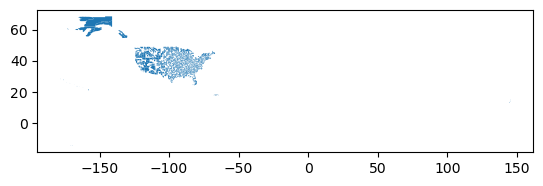

In [20]:
# plot the geodataframe
counties.plot()

### Data selection

Select all the counties for the state of New York in a new variable `ny_counties` and plot them. HINT: to find which counties correspond to NY, look at the metadata.

<AxesSubplot:>

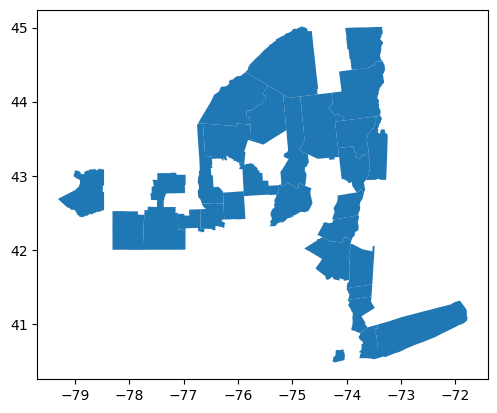

In [21]:
# filter for New York counties using the FIPS code
ny_counties = counties[counties['statefp'] == '36']

# plot the New York counties
ny_counties.plot()

## Merging

The goal of this section is to create a single dataframe with the number of spills per county and the corresponding geometries for each county.

### Explore data

In the next cells:

1. Print the names of counties in `ny_counties`, without repetition.
2. Print the names of counties in `spills_per_county`, without repetition. (Do you notice anything?)
3. Use the [`numpy` function `setdiff1d()`](https://numpy.org/doc/stable/reference/generated/numpy.setdiff1d.html) to find the county names that are in `spills_per_county`, but not in `ny_counties`. HINT: pay attention to the example in the documentation.
4. Find the county names that are in `ny_counties`, but not in `spills_per_county`.
5. Check the number of spills in 'Tuscarora Indian Reservation'.


In [17]:
# 1.

In [18]:
# 2.

In [19]:
# 3.

In [20]:
# 4.

In [21]:
# 5. 


### Data updates

In this section we will update 'St Lawrence' to 'St. Lawrence' in `spills_per_county` data frame.

In the next cells:
1. Check the row in `spills_per_county` that has 'St Lawrence'
2. Run the code and read the explanation in the comments
3. Run the code and read the explanation in the comments
4. Use the `st_lawrence_index` and `at` to update St Lawrence name in `spills_per_county` dataframe
5. Check the update was successfull

In [22]:
# 1. 

In [25]:
# 2. we can get the index of that single row like this, to access the actual row index...
spills_per_county[spills_per_county.county=='St Lawrence'].index

Int64Index([50], dtype='int64')

In [26]:
# 3. we need to select the first item in that tuple using [0]
st_lawrence_index = spills_per_county[spills_per_county.county=='St Lawrence'].index[0]
st_lawrence_index

50

In [23]:
# 4. 

In [24]:
# 5.

### Merge

In the following cells:
1. Use this cell to make any other updates needed for making an inner join of the `spills_per_county` and `ny_counties`. 
2. Over-write `ny_counties` as the  inner join of the `spills_per_county` and `ny_counties` dataframes.

From our previous exploration we know that Tuscarora Indian Reservation will not be in the join. Tuscarora Indian Reservation is located within Niagara county. 

3. Since the Tuscarora Indian Reservation does not appear in the `ny_counties` dataframe, add one spill to Niagara county. We will add a note about this in our final map. Add the cells you need to make this update **and** verify that the dataframe was updated.

In [25]:
# 1. 


In [26]:
# 2.

In [27]:
# your code here

## Map
Create a choropleth map of the number of petroleum spills per county in the state of New York in 2023. 
Your map should have (at least) the following updates:
- a legend indicating the number of spills
- an updated color map
- a title 
- no axis
- an annotation with the data source (New York State Department of Environmental Conservation), date of access HINT: check the graph we did for power plants, 
- an annotation indicating one spill occurred in Tuscarora Indian Reservation within Niagara county

Tuscarora Indian Reservation in Niagara county

In [28]:
# your code here

## Final code

Collect all the relevant code into the first blank cell of the notebook titled "FINAL CODE". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the graph. The *only* ouput of this cell should be the graph you produced in the previous exercise. For each line, add a single comment explaining what the code does.